In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import tree
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
df=pd.read_csv('/content/AgrcultureDataset.csv')

In [ ]:
df.head(8)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2


In [ ]:
df.describe()

,Crop_Year,Area
count,246091.000000,2.460910e+05
mean,2005.643018,1.200282e+04
std,4.952164,5.052340e+04
min,1997.000000,4.000000e-02
25%,2002.000000,8.000000e+01
50%,2006.000000,5.820000e+02
75%,2010.000000,4.392000e+03
max,2015.000000,8.580100e+06


In [ ]:
df.shape

(246091, 7)

In [ ]:
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [ ]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64


In [ ]:
mean_value=df['Production'].mean()
df['Production'].fillna(value=mean_value, inplace=True)

In [ ]:
print(df.isnull().sum())   # After filling the values

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


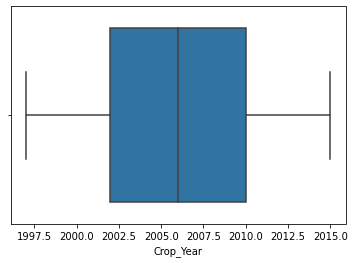

In [ ]:
#Used for Outlier Detection
sns.boxplot(x=df['Crop_Year'])

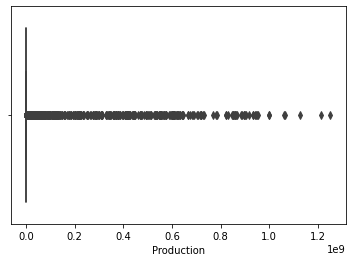

In [ ]:
sns.boxplot(x=df['Production'])

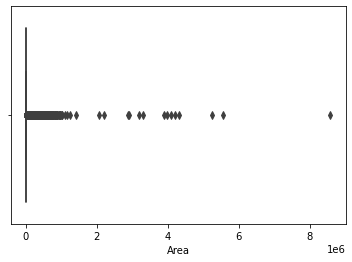

In [ ]:
sns.boxplot(x=df['Area'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Crop_Year        8.0
Area          4312.0
Production    7909.0
dtype: float64


In [ ]:
#OutlierRemovalUsingIQR method
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
df.shape

(191395, 7)

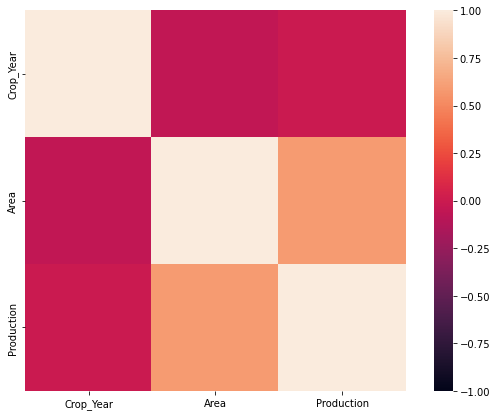

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=1,vmin=-1,square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


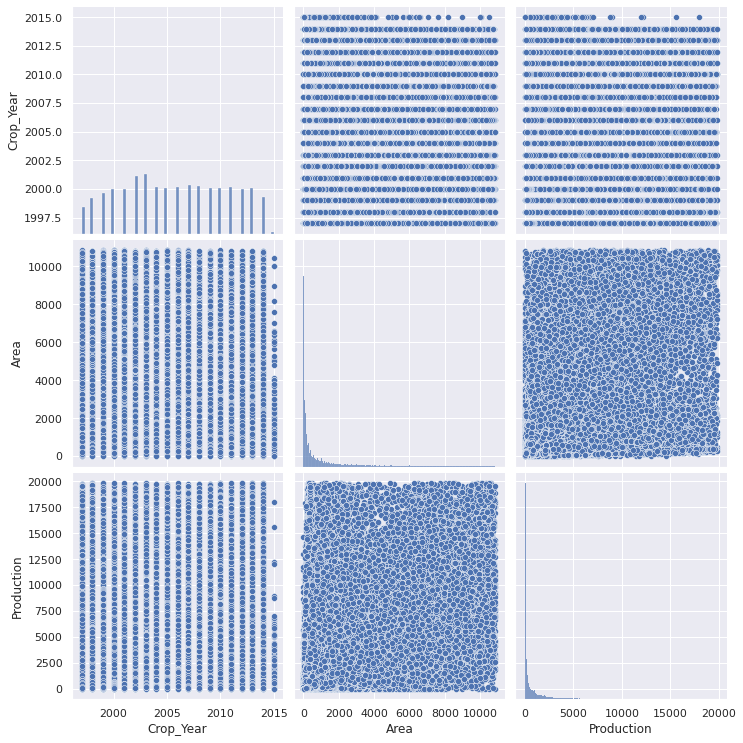

In [ ]:
#relationship between two variables or to form the most separated clusters.
#To plot multiple pairwise bivariate distributions in a dataset.
sns.set()
cols = ['Crop_Year', 'Area', 'Production']
sns.pairplot(df[cols], size = 3.5)
plt.show();

In [ ]:
X=df.iloc[:,0:6]
y=df.iloc[:,6]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['State_Name'] = labelencoder.fit_transform(X['State_Name'])
X['District_Name'] = labelencoder.fit_transform(X['District_Name'])
X['Season'] = labelencoder.fit_transform(X['Season'])
X['Crop'] = labelencoder.fit_transform(X['Crop'])

In [ ]:
X

,State_Name,District_Name,Crop_Year,Season,Crop,Area
0,0,427,2000,1,2,1254.0
1,0,427,2000,1,74,2.0
2,0,427,2000,1,95,102.0
3,0,427,2000,4,7,176.0
4,0,427,2000,4,22,720.0
...,...,...,...,...,...,...
246085,32,471,2014,3,59,325.0
246086,32,471,2014,3,95,306.0
246087,32,471,2014,3,102,627.0
246088,32,471,2014,4,106,324.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
#StandardScalar to standardize data
std=StandardScaler()

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class , not DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)



# To make predictions on the test set, 
y_pred = regressor.predict(X_test)  

# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
177536,3200.0,10940.0
227823,45.0,72.0
127297,300.0,200.0
55390,37.0,9.0
221966,337.0,159.0
...,...,...
26811,7175.0,7939.0
88008,375.0,89.0
90148,94.0,500.0
146415,420.0,300.0


In [ ]:
#R2 score : the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
import sklearn.metrics as sm
print("---- Decision tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

---- Decision tree Regression - Model Evaluation ----
Mean absolute error = 540.8
Mean squared error = 2174794.17
Median absolute error = 58.0
Explain variance score = 0.78
R2 score = 0.78


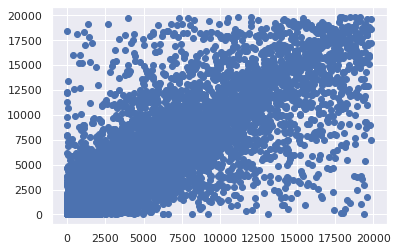

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df

In [ ]:
import sklearn.metrics as sm
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# 70-30 decision tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

In [ ]:
import sklearn.metrics as sm
print("---- Decision tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df

In [ ]:
import sklearn.metrics as sm
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [ ]:
import sklearn.metrics as sm
print("---- Linear tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [ ]:
import sklearn.metrics as sm
print("---- Linear tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
yt = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,yt,test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [ ]:
import sklearn.metrics as sm
print("---- KNN - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
yt = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,yt,test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [ ]:
import sklearn.metrics as sm
print("---- KNN - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

---- KNN - Model Evaluation ----
Mean absolute error = 2023.91
Mean squared error = 11769812.95
Median absolute error = 1009.0
Explain variance score = 0.49
R2 score = 0.27


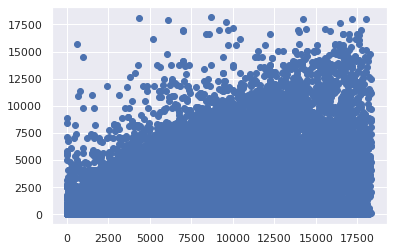

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils
# lab = preprocessing.LabelEncoder()
# from sklearn.preprocessing import MinMaxScaler

# from sklearn.model_selection import train_test_split
# yt = lab.fit_transform(y)
# X_train, X_test, y_train, y_test = train_test_split(X,yt,test_size=0.2, random_state=0)
# scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
# X_train = scaling.transform(X_train)
# X_test = scaling.transform(X_test)

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(C= .1, kernel='linear', gamma= 1)
# svc.fit(X_train, y_train)

In [ ]:
# y_pred = svc.predict(X_test)

In [ ]:
# df = pd.DataFrame({
#     'Actual':y_test,
#     'Predicted':y_pred
# })
# df

In [ ]:
# import sklearn.metrics as sm
# print("---- SVM - Model Evaluation ----")
# print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
# plt.scatter(y_test,y_pred)

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils
# lab = preprocessing.LabelEncoder()
# from sklearn.model_selection import train_test_split
# yt = lab.fit_transform(y)
# X_train, X_test, y_train, y_test = train_test_split(X,yt,test_size=0.3, random_state=0)
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
# X_train = scaling.transform(X_train)
# X_test = scaling.transform(X_test)

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(C= .1, kernel='linear', gamma= 1)
# svc.fit(X_train, y_train)

In [ ]:
# df = pd.DataFrame({
#     'Actual':y_test,
#     'Predicted':y_pred
# })
# df

In [ ]:
# import sklearn.metrics as sm
# print("---- SVM - Model Evaluation ----")
# print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
# plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
79596,311.0,2539.736796
157097,678.3,1204.462220
149288,125.5,1567.913982
71893,60.0,371.623716
234851,2995.0,933.077236
...,...,...
93079,315.0,1411.274580
84394,1627.0,3105.606114
145854,290.0,924.093904
206725,1063.0,1577.848898


In [ ]:
import sklearn.metrics as sm
print("---- Bayesian tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

---- Bayesian tree Regression - Model Evaluation ----
Mean absolute error = 1327.79
Mean squared error = 6218900.92
Median absolute error = 675.95
Explain variance score = 0.37
R2 score = 0.37


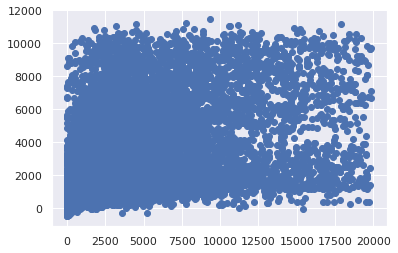

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
79596,311.0,2538.610284
157097,678.3,1204.850320
149288,125.5,1577.487041
71893,60.0,365.777429
234851,2995.0,943.475240
...,...,...
111723,250.0,1925.625259
230802,920.0,5211.912599
188647,973.0,574.977773
171177,1.0,8.272454


In [ ]:
import sklearn.metrics as sm
print("---- Bayesian tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

---- Bayesian tree Regression - Model Evaluation ----
Mean absolute error = 1327.26
Mean squared error = 6186279.08
Median absolute error = 679.31
Explain variance score = 0.37
R2 score = 0.37


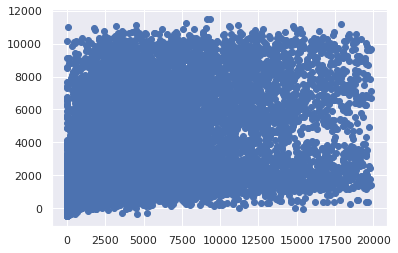

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.36331422, 0.36626139, 0.37386629, 0.36313861, 0.36526071])

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.77537991, 0.77881436, 0.77995918, 0.76755188, 0.77553238])

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(n_estimators=50, random_state=0), X, y, cv=cv)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        
        'Random_Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 80, 100, 120]
            }
        },
        'Bayesian Regression' :{
            'model':BayesianRidge(),
            'params':{
                'normalize': [True, False]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False,n_jobs=-1)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
